# Causal inference using dowhy

- based on https://towardsdatascience.com/beyond-predictive-models-the-causal-story-behind-hotel-booking-cancellations-d29e8558cbaf
- keys explained at https://physionet.org/content/mimic2-iaccd/1.0/

In [3]:
import ehrapy as ep
import dowhy
import econml
import networkx as nx
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import anndata
import dowhy.datasets

In [2]:
import warnings
warnings.filterwarnings("ignore")

2023-06-15 15:39:05,282 - root WARNING - [dowhy] Refutation 'placebo_treatment_refuter' returned invalid pval 'nan', retrying (1/10)
2023-06-15 15:39:05,949 - root WARNING - [dowhy] Refutation 'placebo_treatment_refuter' returned invalid pval 'nan', retrying (2/10)
2023-06-15 15:39:06,579 - root WARNING - [dowhy] Refutation 'placebo_treatment_refuter' returned invalid pval 'nan', retrying (3/10)
2023-06-15 15:39:07,298 - root WARNING - [dowhy] Refutation 'placebo_treatment_refuter' returned invalid pval 'nan', retrying (4/10)
2023-06-15 15:39:07,854 - root WARNING - [dowhy] Refutation 'placebo_treatment_refuter' returned invalid pval 'nan', retrying (5/10)
2023-06-15 15:39:08,474 - root WARNING - [dowhy] Refutation 'placebo_treatment_refuter' returned invalid pval 'nan', retrying (6/10)
2023-06-15 15:39:08,988 - root WARNING - [dowhy] Refutation 'placebo_treatment_refuter' returned invalid pval 'nan', retrying (7/10)
2023-06-15 15:39:09,574 - root WARNING - [dowhy] Refutation 'placebo_

<Axes: title={'center': 'DoWhy estimate $\\rho$ (slope) = 10.002'}, xlabel='v0', ylabel='y'>

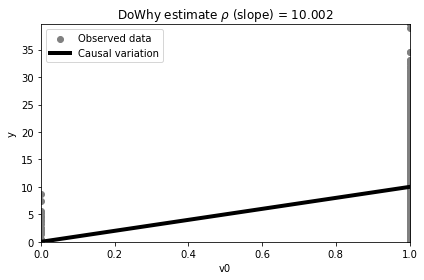

In [4]:
import dowhy.datasets

np.random.seed(8)

methods = [
        # dowhy methods from https://github.com/py-why/dowhy/blob/8fb32a7bf617c1a64a2f8b61ed7a4a50ccaf8d8c/dowhy/causal_model.py#L247
        "backdoor.propensity_score_matching", # no
        "backdoor.propensity_score_stratification", # no
        "backdoor.propensity_score_weighting", # no
        "backdoor.linear_regression", # yes
        "backdoor.generalized_linear_model", # yes
        "iv.instrumental_variable", # no
        "iv.regression_discontinuity",
        # EconML estimators
        "backdoor.econml.linear_model.LinearDML",
        "backdoor.econml.nonparametric_model.NonParamDML",
        "backdoor.econml.causal_forest.CausalForestDML",
        "backdoor.econml.forecast_model.ForestDML",
        "backdoor.econml.dml.DML",
        "backdoor.econml.dml.DMLCate",
        "backdoor.econml.xgboost.XGBTRegressor",
        "backdoor.econml.xgboost.XGBTEstimator",
        "backdoor.econml.metalearners.XLearner",
    ]

data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=1000,
    treatment_is_binary=True,
)

estimate = ep.tl.causal_inference(
    adata=anndata.AnnData(data["df"].astype(np.float32)), 
    graph=data["gml_graph"], 
    treatment="v0", 
    outcome="y",
    estimation_method=methods[3],
    return_as="estimate",
    show_graph=False,
    show_refute_plots=False,
)
ep.tl.plot_causal_effect(estimate)

In [4]:
estimate.estimator._data

,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0.0,0.183633,0.714686,0.710999,1.311852,-2.407911,2.184486,1.0,20.513437
1,0.0,0.591219,-0.314505,2.511515,1.000212,0.893932,0.942224,1.0,20.675055
2,0.0,0.901662,-0.946835,0.343610,0.236749,-0.146248,-1.058117,1.0,3.442153
3,0.0,0.639456,-0.607940,0.644526,1.488327,-1.169113,-2.068047,0.0,-7.204772
4,1.0,0.317188,0.061663,-0.892603,1.576052,-0.577839,-1.133464,1.0,10.875702
...,...,...,...,...,...,...,...,...,...
995,1.0,0.885413,2.574068,0.238842,0.782988,0.978578,-0.423274,1.0,21.923090
996,1.0,0.271771,-0.188572,0.223712,0.019221,0.015805,-1.971028,1.0,1.020493
997,1.0,0.682722,0.445662,-0.842009,-0.469088,-0.697172,-0.554095,1.0,4.519210
998,0.0,0.805902,0.740117,0.853818,0.613848,-0.011116,-1.992928,1.0,6.231642


In [5]:
np.array([1.])

array([1.])

In [6]:
anndata.AnnData(data["df"])["v0"]

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ /Users/tim.treis/anaconda3/envs/ehrapy/lib/python3.10/site-packages/pandas/core/indexes/base.py:3802 in get_loc │
│                                                                                                                 │
│   3799 │   │   │   │   )                                                                                        │
│   3800 │   │   │   casted_key = self._maybe_cast_indexer(key)                                                   │
│   3801 │   │   │   try:                                                                                         │
│ ❱ 3802 │   │   │   │   return self._engine.get_loc(casted_key)                                                  │
│   3803 │   │   │   except KeyError as err:                                                                      │
│   3804 │   │   │   │   raise KeyError(key) from err                                                             │
│   3805 │   │   │   except TypeError:                                                                            │
│                                                                                                                 │
│ in pandas._libs.index.IndexEngine.get_loc:138                                                                   │
│                                                                                                                 │
│ in pandas._libs.index.IndexEngine.get_loc:165                                                                   │
│                                                                                                                 │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:5745                                                       │
│                                                                                                                 │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:5753                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'v0'

The above exception was the direct cause of the following exception:

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 anndata.AnnData(data["df"])["v0"]                                                                           │
│   2                                                                                                             │
│                                                                                                                 │
│ /Users/tim.treis/anaconda3/envs/ehrapy/lib/python3.10/site-packages/anndata/_core/anndata.py:1100 in            │
│ __getitem__                                                                                                     │
│                                                                                                                 │
│   1097 │                                                                                                        │
│   1098 │   def __getitem__(self, index: Index) -> "AnnData":                                                    │
│   1099 │   │   """Returns a sliced view of the object."""                                                       │
│ ❱ 1100 │   │   oidx, vidx = self._normalize_indices(index)                                                      │
│   1101 │   │   return AnnData(self, oidx=oidx, vidx=vidx, asview=True)                                          │
│   1102 │                                                                            

In [7]:
plt.plot(

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ plt.plot(                                                                                                       │
│          ▲                                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: incomplete input

In [8]:
estimate.estimator._outcome_name

'y'

## 1) Create Model

In [5]:
# Assumptions
# - being old and fat makes you have a lot of problems
# - having a lot of problems makes you more likely to die in the hospital
# - having a lot of problems influences your likelihood of getting an IAC
# - having an IAC influences your likelihood of dying in the hospital

adata = ep.dt.mimic_2(encoded=True)

causal_graph = """digraph {
aline_flg[label="Indwelling arterial catheters used"];

age -> sepsis_flg;
age -> chf_flg;
age -> afib_flg;
age -> renal_flg;
age -> liver_flg;
age -> copd_flg;
age -> cad_flg;
age -> stroke_flg;
age -> resp_flg;
bmi -> sepsis_flg;
bmi -> chf_flg;
bmi -> afib_flg;
bmi -> renal_flg;
bmi -> liver_flg;
bmi -> copd_flg;
bmi -> cad_flg;
bmi -> stroke_flg;
bmi -> resp_flg;
sepsis_flg -> aline_flg;
chf_flg -> aline_flg;
afib_flg -> aline_flg;
renal_flg -> aline_flg;
liver_flg -> aline_flg;
copd_flg -> aline_flg;
cad_flg -> aline_flg;
stroke_flg -> aline_flg;
resp_flg -> aline_flg;
sepsis_flg -> icu_los_day;
chf_flg -> icu_los_day;
afib_flg -> icu_los_day;
renal_flg -> icu_los_day;
liver_flg -> icu_los_day;
copd_flg -> icu_los_day;
cad_flg -> icu_los_day;
stroke_flg -> icu_los_day;
resp_flg -> icu_los_day;
aline_flg -> icu_los_day;
}"""

model = dowhy.CausalModel(
    data=adata.to_df(), # 0 is not a problem, because impute
    graph=causal_graph.replace("\n", " "),
    treatment="aline_flg",
    outcome="icu_los_day"
)


2023-06-15 15:39:15,611 - root INFO - Added all columns to `obs`.
2023-06-15 15:39:15,621 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `1776` x `46`.
2023-06-15 15:39:15,621 - root INFO - The original categorical values `['service_unit', 'day_icu_intime']` were added to uns.
2023-06-15 15:39:15,626 - root INFO - Encoding strings in X to save to .h5ad. Loading the file will reverse the encoding.
2023-06-15 15:39:15,627 - root INFO - Updated the original layer after encoding.
2023-06-15 15:39:15,634 - root INFO - The original categorical values `['service_unit', 'day_icu_intime']` were added to obs.


2023-06-15 15:39:20,371 - root WARNING - [dowhy] Refutation 'placebo_treatment_refuter' failed.
2023-06-15 15:39:32,271 - root WARNING - [dowhy] Refutation 'random_common_cause' returned invalid pval 'nan', retrying (1/10)
2023-06-15 15:39:32,734 - root WARNING - [dowhy] Refutation 'placebo_treatment_refuter' failed.


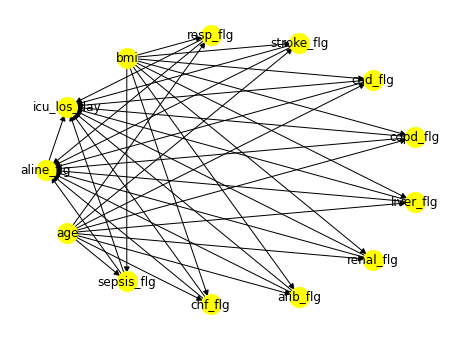

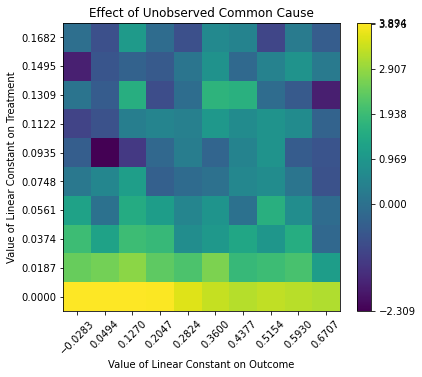

Causal inference results for treatment variable 'aline_flg' and outcome variable 'icu_los_day':
└- Increasing the treatment variable(s) [aline_flg] from 0 to 1 causes an increase of 3.8764921409656874 in the expected value of the outcome [icu_los_day], over the data distribution/population represented by the dataset.

Refutation results
├-Refute: placebo_treatment_refuter
|    └- Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by NearestNeighbors.
├-Refute: Add a random common cause
|    ├- Estimated effect: 3.88
|    ├- New effect: 3.876
|    ├- p-value: 0.159
|    └- Test significance: 3.88
├-Refute: Use a subset of data
|    ├- Estimated effect: 3.88
|    ├- New effect: 2.079
|    ├- p-value: 0.000
|    └- Test significance: 3.88
└-Refute: Add an Unobserved Common Cause
     ├- Estimated effect: 3.88
     ├- New effect: -2.31, 3.89
     ├- p-value: Not applicable
     └- Test significance: 3.88



In [6]:
estimate, refute = ep.tl.causal_inference(
    adata, 
    causal_graph, 
    "aline_flg", 
    "icu_los_day", 
    estimation_method="backdoor.propensity_score_matching",
    return_as="estimate+refute",
    print_summary=True,
    show_graph=True,
    show_refute_plots=True,
)
# ep.tl.plot_causal_effect(estimate)

## 2) Identify Cause

In [11]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[icu_los_day|chf_flg,afib_flg,resp_flg,liver_flg,copd_flg,sepsis
d[aline_flg]                                                                  

                                   
_flg,stroke_flg,cad_flg,renal_flg])
                                   
Estimand assumption 1, Unconfoundedness: If U→{aline_flg} and U→icu_los_day then P(icu_los_day|aline_flg,chf_flg,afib_flg,resp_flg,liver_flg,copd_flg,sepsis_flg,stroke_flg,cad_flg,renal_flg,U) = P(icu_los_day|aline_flg,chf_flg,afib_flg,resp_flg,liver_flg,copd_flg,sepsis_flg,stroke_flg,cad_flg,renal_flg)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [12]:
identified_estimand.te

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 identified_estimand.te                                                                                      │
│   2                                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'IdentifiedEstimand' object has no attribute 'te'

## 3) Estimate identified cause

In [13]:
%%time
estimate = model.estimate_effect(
    identified_estimand, 
    method_name="backdoor.propensity_score_stratification"
)
print(estimate)

propensity_score_stratification
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[icu_los_day|chf_flg,afib_flg,resp_flg,liver_flg,copd_flg,sepsis
d[aline_flg]                                                                  

                                   
_flg,stroke_flg,cad_flg,renal_flg])
                                   
Estimand assumption 1, Unconfoundedness: If U→{aline_flg} and U→icu_los_day then P(icu_los_day|aline_flg,chf_flg,afib_flg,resp_flg,liver_flg,copd_flg,sepsis_flg,stroke_flg,cad_flg,renal_flg,U) = P(icu_los_day|aline_flg,chf_flg,afib_flg,resp_flg,liver_flg,copd_flg,sepsis_flg,stroke_flg,cad_flg,renal_flg)

## Realized estimand
b: icu_los_day~aline_flg+chf_flg+afib_flg+resp_flg+liver_flg+copd_flg+sepsis_flg+stroke_flg+cad_flg+renal_flg
Target units: ate

## Estimate
Mean value

In [14]:
estimate.test_stat_significance()

{'p_value': (0, 0.001)}

## 4) Refute obtained results

In [15]:
refute1_results = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="random_common_cause",
)


In [16]:
dir(refute1_results)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_refuter',
 'add_significance_test_results',
 'estimated_effect',
 'interpret',
 'new_effect',
 'refutation_result',
 'refutation_type',
 'refuter']

In [17]:
refute2_results = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="data_subset_refuter",
)
refute2_results.refutation_result["p_value"]

In [18]:
refute2_results.

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ refute2_results.                                                                                                │
│                 ▲                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: invalid syntax

In [19]:
estimate.test_stat_significance()

{'p_value': (0, 0.001)}